In [1]:
import pandas as pd
import numpy as np
import re
from snownlp import SnowNLP

In [2]:
def wash_text(sentence):
    if pd.isnull(sentence):
        sentence = '空'
    # cnm替换；
    # nmsl替换；
    sentence = sentence.replace('cnm','操你妈')
    sentence = sentence.replace('nmsl','你妈死了')
    # HK替换成香港；
    sentence = sentence.replace('HK','香港').replace('hk','香港')
    # 繁体字替换为简体字
    sentence = SnowNLP(sentence).han
#     # 多个问号替换成1个
#     sub_string = r'\?+'
#     sentence = re.sub(sub_string, '?', sentence)
#     # ?展开全文c及其后面内容去掉；
#     sub_string = r'\?展开全文c*'
#     sentence = re.sub(sub_string,'', sentence)
#     # 去掉【】
#     sentence = sentence.replace('【','').replace('】','')
#     # 去掉结尾的?
#     if sentence[-1] == '?':
#         sentence = sentence[:-1]
#     # 把大写变成小写
#     sentence = sentence.lower()
#     # O网页链接*去掉
#     sub_string = r'O网页链接*'
#     sentence = re.sub(sub_string, '', sentence)
#     # 连续三个以上的英文字母和下划线去掉；
#     sub_string = r'[a-z-]{3}'
#     sentence = re.sub(sub_string, '', sentence).replace('_','')
#     # 《》只去掉两边书名号
#     sub_string = '《*》'
#     sentence = re.sub(sub_string, '', sentence)
    return sentence

def wash_name(name):
    if pd.isnull(name):
        name = ''
    sub_string = r'[^\u4e00-\u9fa5]'
    name = re.sub(sub_string, '', name)
    return name

def wash_pic_url(url):
    if pd.isnull(url):
        url = ''
    if len(url)>3:
        url = ''.join(url[1:-1].split('/')[:4])
        url = url.replace('https://','')
    else:
        url = ''
    return url

def wash_radio_url(url):
    if pd.isnull(url):
        url = ''
    if len(url)>3:
        url = ''.join(url[1:-1].split('/')[:3])
        url = url.replace('https://','')
    else:
        url = ''
    return url

In [10]:
def wash_data(data, labeled=True):
    if labeled:
        data['情感倾向'][data['情感倾向']=='-2'] = '-1'
        data['情感倾向'][data['情感倾向']=='-'] = '-1'
        data = data[data['情感倾向'].isnull()==False]
    data['发布人账号'] = data['发布人账号'].apply(wash_name)
    data['微博中文内容'] = data['微博中文内容'].apply(wash_text)
    data['微博图片'] = data['微博图片'].apply(wash_pic_url)
    data['微博视频'] = data['微博视频'].apply(wash_radio_url)
    data = data.dropna()
    output =  '[' + data['微博发布时间'] + ']' + data['微博中文内容']
    if labeled:
        output = output + 'LABELIS:' + data['情感倾向']
    return output

In [11]:
train_labeled = pd.read_csv('./raw/nCoV_100k_train.labled.csv',encoding='ANSI')
test = pd.read_csv('./raw/nCov_10k_test.csv',encoding='ANSI')

In [12]:
train_labeled_text = wash_data(train_labeled[train_labeled['情感倾向'].isin(['1','-1','0','-2','-'])], labeled=True)
test_text = wash_data(test,labeled=False)

C:\Users\SunMinghong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SunMinghong\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\SunMinghong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [13]:
%matplotlib inline

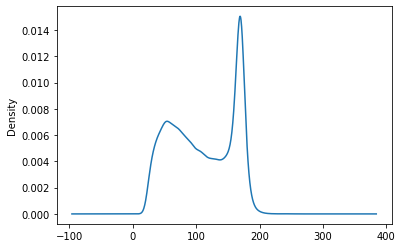

In [14]:
train_labeled_text.apply(len).plot(kind='kde')

In [15]:
test_text

0       [01月01日 23:38]#你好2020#新年第一天元气满满的早起出门买早饭结果高估了自己...
1       [01月02日 23:09]大宝又感冒鼻塞咳嗽了，还有发烧。队友加班几天不回。感觉自己的情绪...
2             [01月03日 23:53]还要去输两天液，这天也太容易感冒发烧了，一定要多喝热水啊?
3                   [01月03日 23:27]我太难了别人怎么发烧都没事就我一检查甲型流感?
4       [01月04日 19:01]果然是要病一场的喽回来第三天开始感冒今儿还发烧了喉咙眼睛都难受的...
                              ...                        
9995                [01月24日 08:46]「2020的黑天鹅事件」>2019-nCov?
9996    [01月24日 15:02]心灵鸡汤#武汉加油#我们所有人，和我们这个国家一起，正在经历着...
9997    [01月24日 16:02]武大人民医院：发热咳嗽并非新冠肺炎的唯一首发症状(来自@界面新闻...
9998                  [01月27日 14:09]闭关第二天发现一根白发2019-nCoV?
9999    [01月27日 23:44]//@高反台:昨天还在想如果有动画短片就好了，今天就有了，视频果...
Length: 10000, dtype: object

In [16]:
with open('./v1_data/train_labeled.txt', 'w', encoding='utf-8') as f:
    for i in train_labeled_text.tolist():
        f.write(i+'\n')
with open('./v1_data/test.txt', 'w', encoding='utf-8') as f:
    for i in test_text.tolist():
        f.write(i+'\n')